In [1]:
!pip install pillow  

In [1]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [31]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac13/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [32]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac13/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [33]:
import os
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac13/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


In [35]:
import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3300  # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3300 입니다.
x_train shape: (3300, 28, 28, 3)
y_train shape: (3300,)


라벨:  0


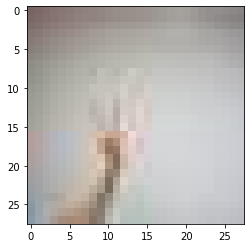

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])  # matplotlib 을 열어 1번째 그림 확인 

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 28*28 3개의 채널(rgb 컬러) -1은 필터의 개수를 자동 계산


n_channel_1=16       
n_channel_2=32
n_dense=64
n_train_epoch=15  #훈련 반복 횟수 

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))  #3x3 필터 사용, 활성화함수는 'relu'
#최초 입력층에 3x3 필터(filter)를 대고 활성화 함수를 'relu'로 빼서 28x28 (rgb 컬러) layer를 쌓음 
model.add(keras.layers.MaxPool2D(2,2)) # 이후 maxpooling으로 최대값을 추출하고 
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu')) #convolution layer 3x3 필터로 다시 relu 활성화 함수 사용
model.add(keras.layers.MaxPooling2D((2,2))) # 다시 maxpooling으로 최대값을 추출하고 
model.add(keras.layers.Flatten()) # flatten 작업을 해줌 
model.add(keras.layers.Dense(n_dense, activation='relu')) #dense layer로 활성화 함수로 'relu' 사용하고 
model.add(keras.layers.Dense(3, activation='softmax')) # 3가지(가위,바위,보)로 분류 문제가 softmax (확률의 합=1)함수로 분류함

model.summary() #모델 요약 정보 확인

# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 컴파일 할 때, 최적화함수로 'adam'을 사용하고 loss function으로 범주형 교차엔트로피를 사용하고, 측정값으로 정확도를 측정함 

model.fit(x_train_reshaped, y_train,epochs=n_train_epoch)
#model을 fitting 함, epoch 은 훈련 횟수임 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [62]:
# 테스트 이미지
import os
# 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/paper/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

이미지 디렉토리 경로:  /home/ssac13/aiffel/rock_scissor_paper/test


In [63]:
# 테스트 이미지
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)  # 28x8 size 이미지 3가지 컬러(rgb)

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


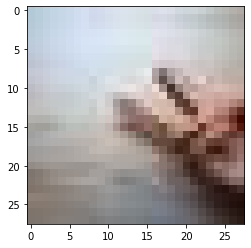

In [64]:
# 불러온 이미지 확인
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0]) 

In [65]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))         # test-set 의 loss 0.3% 
print("test_accuracy: {}".format(test_accuracy))  # test-set의 결과 99% 정확도 (아주 우수한 모델임)

10/10 - 0s - loss: 0.0333 - accuracy: 0.9967
test_loss: 0.03333401307463646 
test_accuracy: 0.996666669845581
